In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

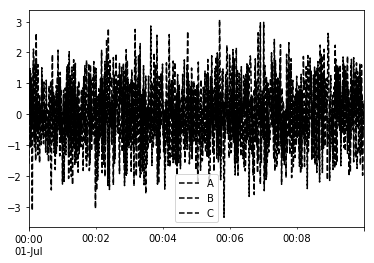

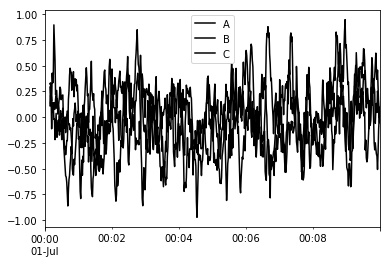

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,0.699533,-0.439833,0.661400
2016-07-01 00:00:02,0.140693,0.280594,0.969827
2016-07-01 00:00:03,0.496817,0.219712,0.355096
2016-07-01 00:00:04,0.440759,0.464448,0.364715
2016-07-01 00:00:05,0.360217,0.257072,0.122687
2016-07-01 00:00:06,0.261255,0.119194,-0.545964
2016-07-01 00:00:07,0.185729,0.247258,-0.220807
2016-07-01 00:00:08,0.440904,0.239270,0.195712
2016-07-01 00:00:09,0.241562,0.077126,0.462990


In [8]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [9]:
df.head()

,A,B,C,D
2016-06-06,-0.228973,-0.079690,1.383342,1.363703
2016-06-07,0.588637,1.081830,0.424868,-1.698130
2016-06-08,0.209975,0.475028,-0.302763,0.614734
2016-06-09,1.123120,1.753761,-1.515390,0.416073
2016-06-10,0.264059,1.780249,0.490022,-1.767618


array([<matplotlib.axes._subplots.AxesSubplot object at 0x114e58828>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1151a2550>], dtype=object)

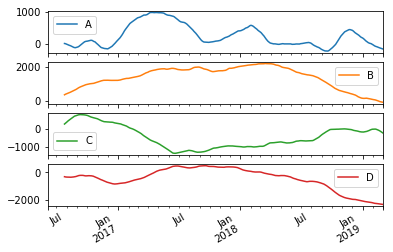

In [10]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [11]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.009006,1.251946,0.444718,1.142477


In [12]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,0.065345,0.461225,1.595776,0.514638
2016-06-08,0.233443,0.799872,1.565666,0.436527
2016-06-09,0.598272,1.407636,1.171764,0.501491
2016-06-10,0.869981,2.128345,1.033427,0.186945


In [13]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

In [14]:
# EWMA
# Why use EWMA?

In [15]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting